In [10]:
# !pip install kaggle
# !kaggle datasets download -d ahemateja19bec1025/traffic-sign-dataset-classification
!unzip traffic-sign-dataset-classification.zip -d traffic_sign_dataset


Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/traffic_Data/DATA/24/024_1_0040.png  
  inflating: traffic_sign_dataset/traffic_Data/DATA/24/024_1_0041.png  
  inflating: traffic_sign_dataset/traffic_Data/DATA/24/024_1_0042.png  
  inflating: traffic_sign_dataset/traffic_Data/DATA/24/024_1_0043.png  
  inflating: traffic_sign_dataset/traffic_Data/DATA/24/024_1_0044.png  
  inflating: traffic_sign_dataset/traffic_Data/DATA/24/024_1_0045.png  
  inflating: traffic_sign_dataset/traffic_Data/DATA/24/024_1_0046.png  
  inflating: traffic_sign_dataset/traffic_Data/DATA/24/024_1_0047.png  
  inflating: traffic_sign_dataset/traffic_Data/DATA/24/024_1_0048.png  
  inflating: traffic_sign_dataset/traffic_Data/DATA/24/024_1_0049.png  
  inflating: traffic_sign_dataset/traffic_Data/DATA/25/025_0001.png  
  inflating: traffic_sign_dataset/traffic_Data/DATA/25/025_1_0001.png  
  inflating: traffic_sign_dataset/traffic_Data/DATA/26/026_0001.png  
  inflating: traf

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Define the CNN model
def create_cnn_model(input_shape):
    model = models.Sequential()

    # First convolutional layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    # Second convolutional layer
    model.add(layers.Conv2D(64, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Third convolutional layer
    model.add(layers.Conv2D(128, (2, 2), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten and add dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(58, activation='softmax'))  # Assuming 58 classes for traffic signs

    return model

# Create the model
input_shape = (150, 150, 3)
model = create_cnn_model(input_shape)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Load the dataset
batch_size = 50
image_height = 150
image_width = 150

training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'traffic_sign_dataset/traffic_Data/DATA',
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(image_height, image_width),
    batch_size=batch_size
)

testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'traffic_sign_dataset/traffic_Data/DATA',
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(image_height, image_width),
    batch_size=batch_size
)

# Train the model
history = model.fit(training_ds, validation_data=testing_ds, epochs=10)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 70, 70, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 58)                  │           7,482 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,827,642 (18.42 MB)

 Trainable params: 4,827,642 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Found 4170 files belonging to 58 classes.
Using 3336 files for training.
Found 4170 files belonging to 58 classes.
Using 834 files for validation.
Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 190ms/step - accuracy: 0.2855 - loss: 55.1160 - val_accuracy: 0.8118 - val_loss: 0.8221
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - accuracy: 0.8943 - loss: 0.4427 - val_accuracy: 0.9412 - val_loss: 0.2711
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.9761 - loss: 0.1121 - val_accuracy: 0.9640 - val_loss: 0.1805
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.9854 - loss: 0.0481 - val_accuracy: 0.9772 - val_loss: 0.1213
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.9984 - loss: 0.0133 - val_accuracy: 0.9820 - val_loss: 0.1301
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 0.9808 - val_loss: 0.1108
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 1.0000 - loss: 0.0011 - 

In [ ]:
model.save_weights("traffic.weights.h5")

In [9]:
import os
import cv2
import numpy as np
from imgaug import augmenters as iaa
from collections import defaultdict

# Define paths
data_dir = 'traffic_sign_dataset/traffic_Data/DATA'
test_dir = 'traffic_sign_dataset/traffic_Data/TEST'

# Define augmentation sequence
seq = iaa.Sequential([
    iaa.Fliplr(0.5),  # horizontal flips
    iaa.Crop(percent=(0, 0.1)),  # random crops
    iaa.GaussianBlur(sigma=(0, 0.5)),  # blur images with a sigma of 0 to 0.5
    iaa.Multiply((0.8, 1.2)),  # change brightness
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},  # scale images
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},  # translate images
        rotate=(-25, 25),  # rotate images
        shear=(-8, 8)  # shear images
    )
])

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            images.append((img, img_path))
    return images

def augment_and_save_images(images, output_folder, augment_count=5):
    for img, img_path in images:
        for i in range(augment_count):
            augmented_img = seq(image=img)
            base_name = os.path.basename(img_path)
            name, ext = os.path.splitext(base_name)
            new_filename = f"{name}_aug_{i}{ext}"
            cv2.imwrite(os.path.join(output_folder, new_filename), augmented_img)

def count_images_in_folders(base_folder):
    count_dict = defaultdict(int)
    for class_folder in os.listdir(base_folder):
        class_path = os.path.join(base_folder, class_folder)
        if os.path.isdir(class_path):
            count_dict[class_folder] = len(os.listdir(class_path))
    return count_dict






In [11]:
# Show statistics before and after augmentation
# aug_data_dir = 'traffic_sign_dataset/traffic_Data/AUGMENTED_DATA/'
print("Statistics before augmentation:")
before_augmentation = count_images_in_folders(data_dir)
for class_id, count in before_augmentation.items():
    print(f"Class {class_id}: {count} images")

# Load and augment images
for class_folder in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_folder)
    if os.path.isdir(class_path):
        images = load_images_from_folder(class_path)
        augment_and_save_images(images, class_path)

print("\nStatistics after augmentation:")
after_augmentation = count_images_in_folders(data_dir)
for class_id, count in after_augmentation.items():
    print(f"Class {class_id}: {count} images")

Statistics before augmentation:
Class 16: 142 images
Class 10: 70 images
Class 53: 2 images
Class 4: 98 images
Class 11: 138 images
Class 40: 32 images
Class 9: 2 images
Class 31: 42 images
Class 6: 78 images
Class 33: 4 images
Class 23: 14 images
Class 24: 100 images
Class 30: 150 images
Class 18: 8 images
Class 13: 36 images
Class 56: 110 images
Class 36: 40 images
Class 38: 30 images
Class 32: 14 images
Class 51: 8 images
Class 41: 18 images
Class 5: 194 images
Class 15: 22 images
Class 52: 36 images
Class 17: 130 images
Class 26: 126 images
Class 14: 128 images
Class 44: 30 images
Class 37: 58 images
Class 12: 96 images
Class 50: 56 images
Class 0: 118 images
Class 49: 42 images
Class 34: 26 images
Class 3: 260 images
Class 22: 18 images
Class 35: 156 images
Class 20: 18 images
Class 47: 12 images
Class 43: 82 images
Class 25: 2 images
Class 54: 324 images
Class 45: 24 images
Class 21: 12 images
Class 29: 44 images
Class 57: 6 images
Class 2: 80 images
Class 19: 4 images
Class 27: 

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Define the CNN model
def create_cnn_model(input_shape):
    model = models.Sequential()

    # First convolutional layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    # Second convolutional layer
    model.add(layers.Conv2D(64, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Third convolutional layer
    model.add(layers.Conv2D(128, (2, 2), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten and add dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(58, activation='softmax'))  # Assuming 58 classes for traffic signs

    return model

# Create the model
input_shape = (150, 150, 3)
model = create_cnn_model(input_shape)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Load the dataset
batch_size = 50
image_height = 150
image_width = 150

training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'traffic_sign_dataset/traffic_Data/DATA',
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(image_height, image_width),
    batch_size=batch_size
)

testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'traffic_sign_dataset/traffic_Data/DATA',
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(image_height, image_width),
    batch_size=batch_size
)

# Train the model
history = model.fit(training_ds, validation_data=testing_ds, epochs=10)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 70, 70, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 58)                  │           7,482 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,827,642 (18.42 MB)

 Trainable params: 4,827,642 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Found 25020 files belonging to 58 classes.
Using 20016 files for training.
Found 25020 files belonging to 58 classes.
Using 5004 files for validation.
Epoch 1/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 36s 82ms/step - accuracy: 0.1697 - loss: 12.1753 - val_accuracy: 0.3445 - val_loss: 2.4810
Epoch 2/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 36s 72ms/step - accuracy: 0.3845 - loss: 2.3239 - val_accuracy: 0.4448 - val_loss: 1.9898
Epoch 3/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 40s 70ms/step - accuracy: 0.5066 - loss: 1.7163 - val_accuracy: 0.4860 - val_loss: 1.8219
Epoch 4/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 28s 70ms/step - accuracy: 0.5959 - loss: 1.3368 - val_accuracy: 0.5112 - val_loss: 1.8490
Epoch 5/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 42s 72ms/step - accuracy: 0.6730 - loss: 1.0574 - val_accuracy: 0.5288 - val_loss: 1.9110
Epoch 6/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 41s 72ms/step - accuracy: 0.7418 - loss: 0.8307 - val_accuracy: 0.5360 - val_loss: 2.0582
Epoch 7/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 45s 82ms/step - accuracy: 0.

In [14]:
class_name = training_ds.class_names

class_name

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '5',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '6',
 '7',
 '8',
 '9']

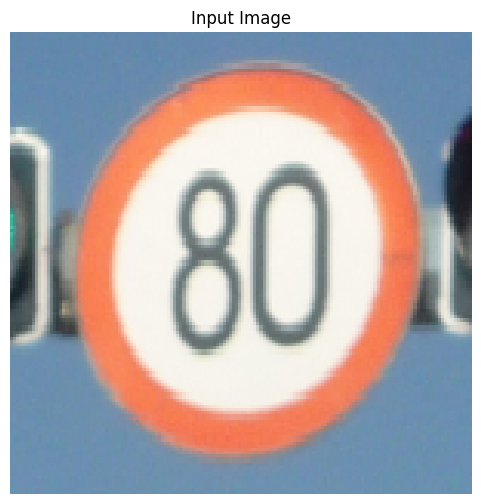

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 756ms/step
Predicted Traffic Sign: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


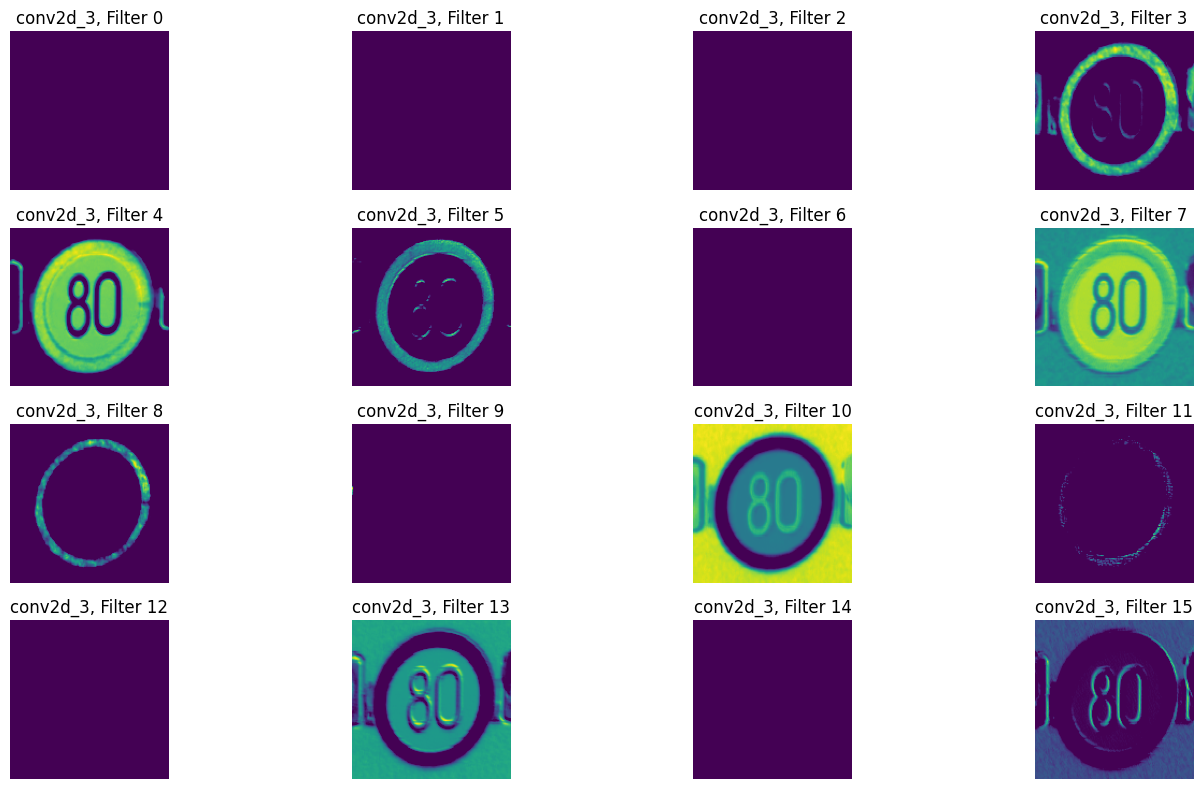

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


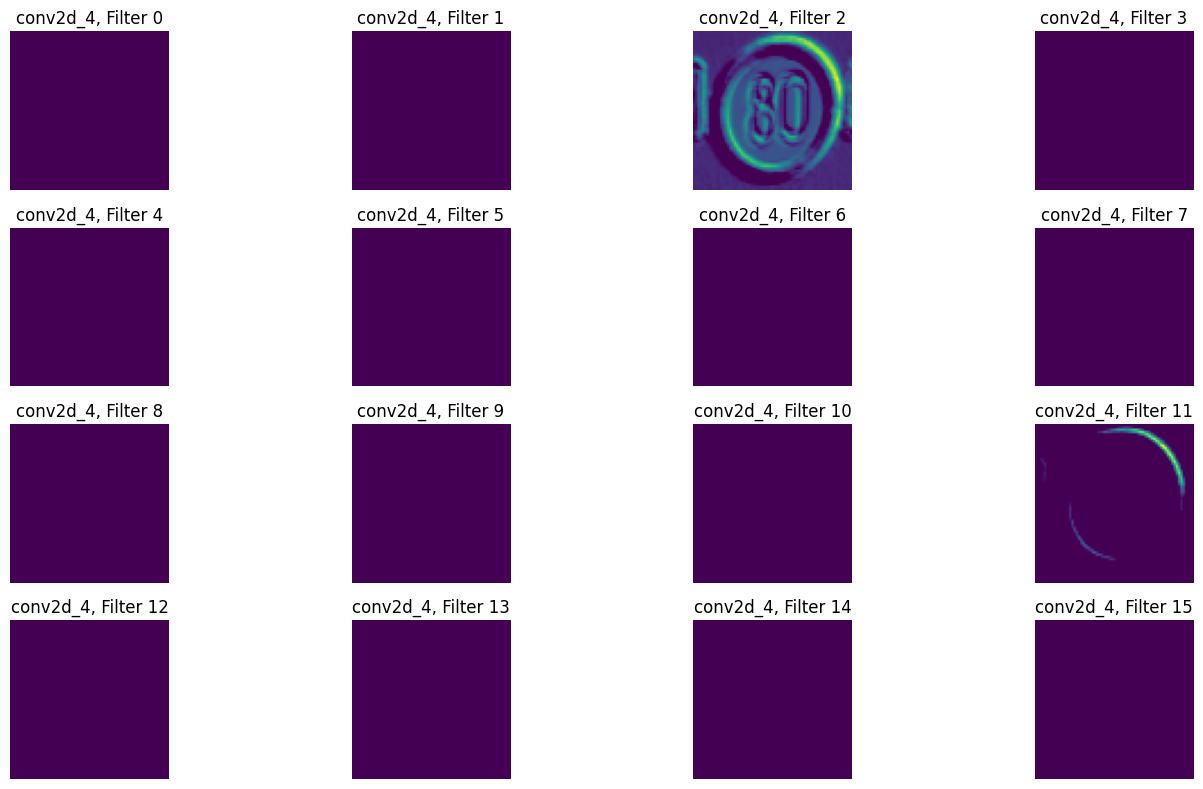

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


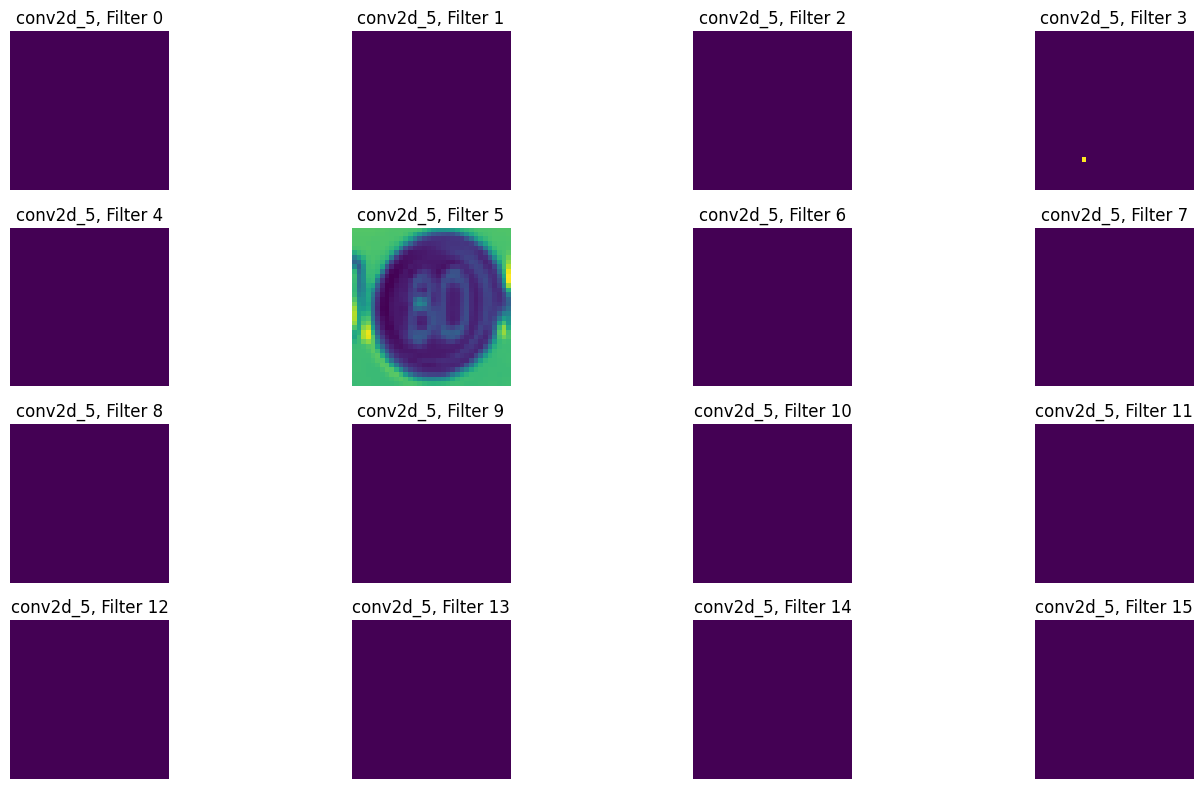

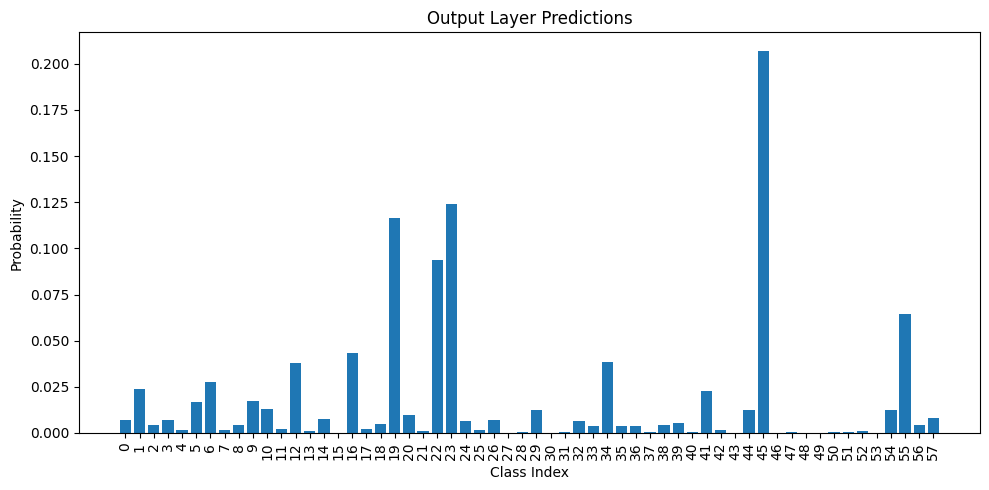

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def predict_and_visualize_traffic_sign(image_path, model, class_names):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension

    # Visualize the input image
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title("Input Image")
    plt.axis('off')
    plt.show()

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    predicted_sign = class_names[predicted_class]
    print("Predicted Traffic Sign:", predicted_sign)

    # Visualize feature maps
    for layer in model.layers:
        if isinstance(layer, tf.keras.layers.Conv2D):
            # Create a new model that outputs the current layer's activations
            temp_model = tf.keras.models.Model(inputs=model.inputs, outputs=layer.output)
            activations = temp_model.predict(img_array)

            # Plot feature maps
            plt.figure(figsize=(15, 8))
            for i in range(min(16, activations.shape[-1])):  # Display up to 16 feature maps
                plt.subplot(4, 4, i+1)
                plt.imshow(activations[0, :, :, i], cmap='viridis')
                plt.title(f'{layer.name}, Filter {i}')
                plt.axis('off')
            plt.tight_layout()
            plt.show()

    # Visualize output layer
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(class_names)), predictions[0])
    plt.title("Output Layer Predictions")
    plt.xlabel("Class Index")
    plt.ylabel("Probability")
    plt.xticks(range(len(class_names)), range(len(class_names)), rotation=90)
    plt.tight_layout()
    plt.show()

    return predicted_sign

# Example usage
image_path = '/content/traffic_sign_dataset/traffic_Data/DATA/7/007_0007.png'
predicted_sign = predict_and_visualize_traffic_sign(image_path, model, class_name)

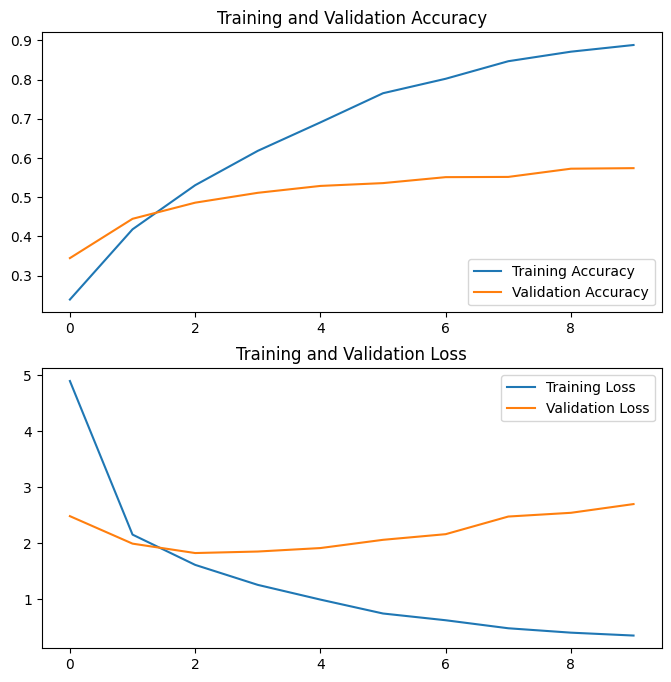

Maximum Validation Accuracy: 0.5741406679153442


In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = len(acc) # Get the number of epochs from the history object

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Display the maximum validation accuracy
print("Maximum Validation Accuracy:", max(val_acc))